# practicalMixGaussC

The goal of this part of the lab is to fit a mixture of gaussians model to some multi-dimensional data. To do this, we will first generate some data from a known mixture of gaussians model and fit our own mixture of gaussians model to the generated data. The parameters from our estimated mixture of gaussians model should roughly match those of the original known model. 

Note that you should not use multivariate_normal.pdf for calculating likelihood.

You should use this template for your code and fill in the missing 
sections marked "TO DO."



In [46]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
import time
import sys
flt_min = sys.float_info.min

%matplotlib inline

## Construct Ground Truth Mixture of Gaussians Model and Plot Some Points

Define some true parameters for our ground truth mixture of $k$ Gaussians model. We will represent the 
mixtures of Gaussians as a python dictionary. The mean field is a $d \times k$ matrix and the cov field is a 
$d \times d \times k$ matrix.

In [47]:
mixGaussTrue = dict()
mixGaussTrue['k'] = 3 # Number of components
mixGaussTrue['d'] = 2 # Dimension
mixGaussTrue['weight'] = np.array([0.1309, 0.3966, 0.4725])
mixGaussTrue['mean'] = np.array([[ 4.0491 , 4.8597],[ 7.7578 , 1.6335],[ 11.9945, 8.9206]]).T
mixGaussTrue['cov'] = np.reshape([0.5, 0.25], newshape=(1,1,2))
mixGaussTrue['cov'] = np.zeros(shape=(mixGaussTrue['d'],mixGaussTrue['d'],mixGaussTrue['k']))
mixGaussTrue['cov'][:,:,0] = np.array([[  4.2534, 0.4791], [0.4791, 0.3522]])
mixGaussTrue['cov'][:,:,1] = np.array([[  0.9729, 0.8723],[  0.8723,  2.6317]])
mixGaussTrue['cov'][:,:,2] = np.array([[  0.9886, -1.2244],[ -1.2244, 3.0187]])

C:\Users\44774\AppData\Local\Temp\ipykernel_20208\522569266.py:6: DeprecationWarning: `newshape` keyword argument is deprecated, use `shape=...` or pass shape positionally instead. (deprecated in NumPy 2.1)
  mixGaussTrue['cov'] = np.reshape([0.5, 0.25], newshape=(1,1,2))


**drawEMData2d**, **sampleFromDiscrete**, **getGaussian2SD**, and **drawGaussianOutline** are helper functions.

In [48]:
def sampleFromDiscrete(probDist):     
    """
    Draws a random sample from a discrete probability distribution using a rejection sampling method.  
    
    Keyword arguments:
    probDist -- discrete probability ditrubtion to sample from.
    
    Returns: 
    r -- sampled point.
    """
    nIndex = len(probDist)                                                                 
    while True:                                                                            
        #choose random index                                                               
        r=int(np.floor(np.random.uniform()*nIndex))                                        
        #choose random height                                                              
        randHeight = np.random.uniform()                                                   
        #if height is less than probability value at this point in the                     
        # histogram then select                                                            
        if randHeight<probDist[r]:                                                         
            break                                                                          
    return r                                                                               

In [49]:
def getGaussian2SD(m,s,angle1):
    """
    Find position of in xy co-ordinates at 2SD out for a certain angle.
    """
  
    if s.shape[1] == 1:
        s = diag(s)

    vec = np.array([np.cos(angle1), np.sin(angle1)])
    
    factor = 4/(vec@np.linalg.inv(s)@vec.T)
    
    x = np.cos(angle1) * np.sqrt(factor)
    y = np.sin(angle1) * np.sqrt(factor)

    x = x + m[0]
    y = y + m[1]
                
    return x,y

In [50]:
def drawGaussianOutline(m,s,w):
    """
    Draw 2DGaussian
    """
    angleInc = 0.1    
    c = (0.9*(1-w), 0, 0)

    for cAngle in np.arange(0,2*np.pi,angleInc):         
        angle1 = cAngle
        angle2 = cAngle+angleInc
        x1, y1 = getGaussian2SD(m,s,angle1)
        x2, y2 = getGaussian2SD(m,s,angle2)
        plt.plot([x1, x2],[y1, y2],'-',linewidth=2,color=c)                 
    return

In [51]:
def drawEMData2d(data,mixGauss):
    """
    Plot the data plot the mixtures of Gaussian model, mixGauss, on top of it.
    
    Keyword arguments:
    data -- d by n matrix of data points.
    mixGauss -- dict with mixture of gaussian information.
    
    """
    #set(gcf,'Color',[1 1 1])
    plt.cla() 
    plt.plot(data[0,:],data[1,:],'k.')

    for cGauss in range(mixGauss['k']):
        drawGaussianOutline(mixGauss['mean'][:,cGauss],mixGauss['cov'][:,:,cGauss],mixGauss['weight'][cGauss])
    plt.show() 


**TODO HERE:**

Complete the TO DO in this function before moving on.

In [52]:
def mixGaussGen(mixGauss, nData):                                                                              
    """
    Generates synthetic data from a d-dimensional mixture of Gaussians model. 
    
    Keyword arguments:
    mixGauss -- dict containing the mixture of gaussians arguments.
    nData -- number of data points to generate.
    
    Returns: 
    data -- d by nData, generated data points. 
    
    """
    # create space for output data                                                                               
    data = np.zeros(shape=(mixGauss['d'], nData))                                                                            
    # for each data point                                                                                        
    for cData in range(nData):                                                                                   
        # randomly choose Gaussian according to probability distributions                                        
        h = sampleFromDiscrete(mixGauss['weight'])
                                                                       
        # draw a sample from the appropriate Gaussian distribution  
        # first sample from the covariance matrix (google how to do this - it
        # will involve the numpy function np.linalg.cholesky().  Then add the mean vector
        # TO DO (f)- insert data generation code here    
                                                                                   
        # Draw samples from appropriate Gaussian distribution
        # Sample a standard normal distribution of size d
        z = np.random.normal(size = (mixGauss['d']))
        
        # Perform Cholesky decomposition on the covariance matrix
        try:
            L = np.linalg.cholesky(mixGauss['cov'][:, :, h])
        except np.linalg.LinAlgError:
            raise ValueError("Covariance matrix is not positive definite.")
        
        # Add mean vector to the product of L and z
        data[:,cData] = mixGauss['mean'][:,h] + L@z    
                                                                                                         
    return data

With all the helper functions complete, we can now generate and plot some points from our model. The black points are the generated data points. The circles are what the gaussians look like.

**Comments**:
- **Plot**: The code plots 2D synthetic data from a Mixture of Gaussians model, with black dots representing data points and red contours showing the 2-standard-deviation outlines. The clusters are well-separated, and the contours accurately reflect the shape and orientation specified by the covariance matrices, indicating proper use of model parameters.
- **Improvement**: To enhance the analysis, you could 
    1. Examining the consistency of cluster density across multiple runs to account for stochastic variations
    2. Conducting a sensitivity analysis on the covariance matrices to evaluate the robustness of the Gaussian contours
    3. Investigating outliers to understand their impact on the model, potentially using statistical tests for a thorough validation.


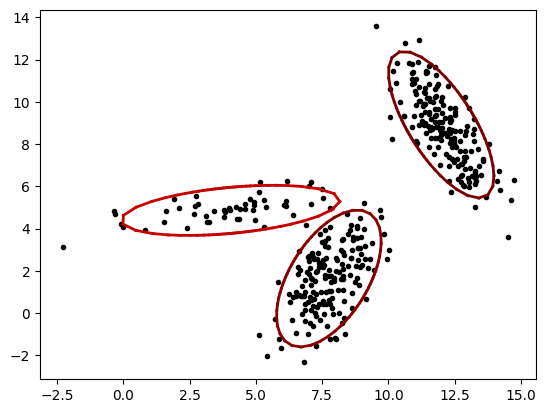

In [53]:
#define number of samples to generate
nData = 400

#generate data from the mixture of Gaussians
#make sure you've filled in the routine above.
data = mixGaussGen(mixGaussTrue,nData)

#draw data, true Gaussians
drawEMData2d(data,mixGaussTrue)

## Estimate MoG using the E-M Algorithm
Here we want to use the E-M algorithm to fit a MoG model to our data points. 

**TODO HERE:** 

Fill out the missing parts below. 

The log likelihood is taken since the raw likelihood value could be too small for our machine's percision.

In [54]:
def getMixGaussLogLike(data, mixGaussEst):  
    """
    Calculate the log likelihood for the whole dataset under a mixture of Gaussians model.
    
    Keyword arguments:
    data -- d by n matrix containing data points.
    mixGaussEst -- dict containing the mixture of Gaussians parameters.

    Returns: 
    logLike -- scalar containing the log likelihood.
    """
    data = np.atleast_2d(data)                                                                         
    nDims, nData = data.shape                                                                           
                                                                                                         
    # Initialize log likelihood                                                                        
    logLike = 0                                                                                         
                                                                                                         
    # Extract parameters of the MoG model
    nGauss = mixGaussEst['k']
    weights = mixGaussEst['weight']
    means = mixGaussEst['mean']
    covariances = mixGaussEst['cov']                                                                                       
                                                                                                     
    # Loop through each data item                                                                       
    for cData in range(nData):                                                                         
        thisData = data[:, cData] 
                                                                                                      
        # Calculate the total likelihood for this data point
        like = 0
        
        # Compute the weighted likelihood under each Gaussian component
        for cGauss in range(nGauss):
            mean_k = means[:, cGauss]
            cov_k = covariances[:, :, cGauss]
            weight_k = weights[cGauss]
            
            # Manually compute the multivariate normal PDF
            diff = thisData - mean_k
            cov_inv = np.linalg.inv(cov_k)
            cov_det = np.linalg.det(cov_k)
            
            # Gaussian probability density
            exponent = -0.5 * diff.T @ cov_inv @ diff
            normalization = np.sqrt((2 * np.pi) ** nDims * cov_det)
            gaussProb = (1.0 / normalization) * np.exp(exponent)
            
            # Add the weighted probability to the total likelihood
            like += weight_k * gaussProb
        
        # Add to the total log likelihood, adding a small constant for numerical stability
        logLike += np.log(like + 1e-10)
                                                                                                         
    return logLike.item()



**TODO HERE:** 

Fill out the missing parts below. 

In [55]:
def fitMixGauss(data, k):
    """
    Estimate a k MoG model that would fit the data. Incrementally plots the outcome.
    
    Keyword arguments:
    data -- d by n matrix containing data points.
    k -- scalar representing the number of Gaussians to use in the MoG model.
    
    Returns: 
    mixGaussEst -- dict containing the estimated MoG parameters.
    """
    # MAIN E-M ROUTINE
    nDims, nData = data.shape
    postHidden = np.zeros(shape=(k, nData))

    # Initialize random values
    mixGaussEst = {
        'd': nDims,
        'k': k,
        'weight': (1 / k) * np.ones(shape=(k)),
        'mean': 2 * np.random.randn(nDims, k),
        'cov': np.zeros(shape=(nDims, nDims, k))
    }
    
    for cGauss in range(k):
        mixGaussEst['cov'][:, :, cGauss] = 2.5 + 1.5 * np.random.uniform() * np.eye(nDims)

    # Calculate current likelihood
    logLike = getMixGaussLogLike(data, mixGaussEst)
    print(f'Log Likelihood Iter 0 : {logLike:4.3f}\n')

    nIter = 30
    fig, ax = plt.subplots(1, 1)

    for cIter in range(nIter):
        # =====================
        # Expectation Step
        # =====================
        for cData in range(nData):
            thisData = data[:, cData]
            # Calculate unnormalized responsibilities
            for cGauss in range(k):
                mean_k = mixGaussEst['mean'][:, cGauss]
                cov_k = mixGaussEst['cov'][:, :, cGauss]
                weight_k = mixGaussEst['weight'][cGauss]

                # Manual computation of Gaussian probability density
                diff = thisData - mean_k
                cov_inv = np.linalg.inv(cov_k)
                cov_det = np.linalg.det(cov_k)
                exponent = -0.5 * diff.T @ cov_inv @ diff
                normalization = np.sqrt((2 * np.pi) ** nDims * cov_det)
                gaussProb = (1.0 / normalization) * np.exp(exponent)

                postHidden[cGauss, cData] = weight_k * gaussProb

            # Normalize responsibilities to sum to 1
            postHidden[:, cData] /= (np.sum(postHidden[:, cData]) + 1e-10)
        
        # =====================
        # Maximization Step
        # =====================
        for cGauss in range(k):
            # Update weights
            mixGaussEst['weight'][cGauss] = np.sum(postHidden[cGauss, :]) / nData

            # Update means
            weighted_sum = np.sum(postHidden[cGauss, :] * data, axis=1)
            mixGaussEst['mean'][:, cGauss] = weighted_sum / np.sum(postHidden[cGauss, :])

            # Update covariances
            cov_sum = np.zeros((nDims, nDims))
            for cData in range(nData):
                diff = data[:, cData] - mixGaussEst['mean'][:, cGauss]
                cov_sum += postHidden[cGauss, cData] * np.outer(diff, diff)
            mixGaussEst['cov'][:, :, cGauss] = cov_sum / np.sum(postHidden[cGauss, :])
        
        # Draw the new solution
        drawEMData2d(data, mixGaussEst)
        time.sleep(0.7)
        fig.canvas.draw()

        # Calculate the log likelihood
        logLike = getMixGaussLogLike(data, mixGaussEst)
        print(f'Log Likelihood After Iter {cIter} : {logLike:4.3f}\n')

    return mixGaussEst


### Time to put it all together!

Make sure you've filled all the TO DOs above! 

### Comments on the Outputs and Convergence (based on one of the runs)
1. Early Iterations (0–2): 
- The ellipses are randomly initialized and do not align well with the data clusters.
- High overlap between Gaussian components is observed due to the random initialization of means and covariances.
- This stage is expected but highlights the sensitivity of the E-M algorithm to initialization.
2. Mid Iterations (6–10):
- The Gaussians start aligning with the underlying clusters, with reduced overlap and better-fitting shapes.
- By Iteration 10, the components fit the clusters reasonably well, capturing the variance and orientation of most clusters.
3. Convergence (15th Iteration onwards):
- The parameters have stabilized, and the ellipses tightly fit the three primary clusters.
- Minimal changes are observed after Iteration 15, suggesting convergence of the E-M algorithm.
- One Gaussian occasionally misaligns with an elongated or irregular cluster, indicating limitations in modeling non-spherical clusters.

Thoughts on improving robustness: 
- **Better Initialization**: Use K-means clustering for initializing means and covariances to speed up convergence and reduce sensitivity to initialization.
- **Regularization**: Add small regularization terms to covariance matrices to avoid degenerate or overly large shapes.
- **Validation**: Use log-likelihood or external metrics (e.g., silhouette scores) on holdout data to validate the fit and ensure generalizability.

Log Likelihood Iter 0 : -7325.923



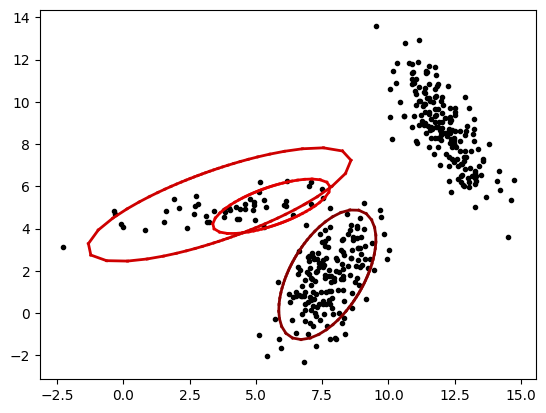

Log Likelihood After Iter 0 : -3332.659



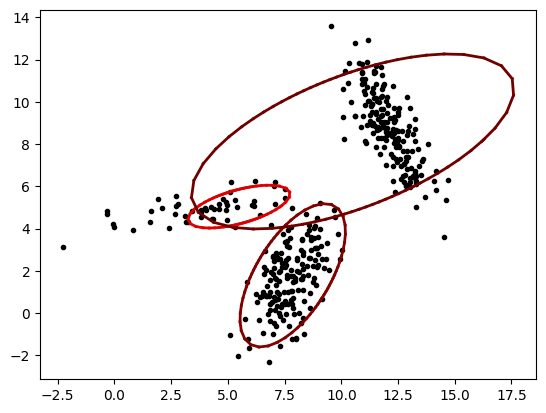

Log Likelihood After Iter 1 : -1873.132



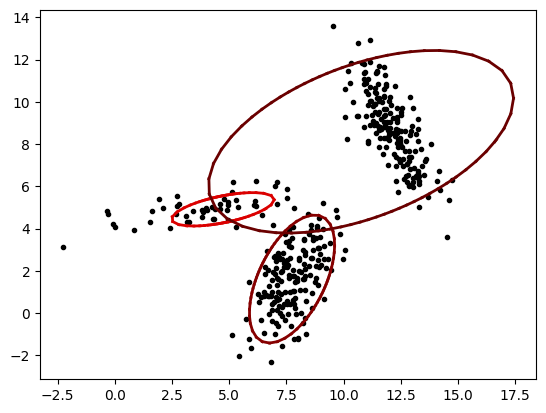

Log Likelihood After Iter 2 : -1832.568



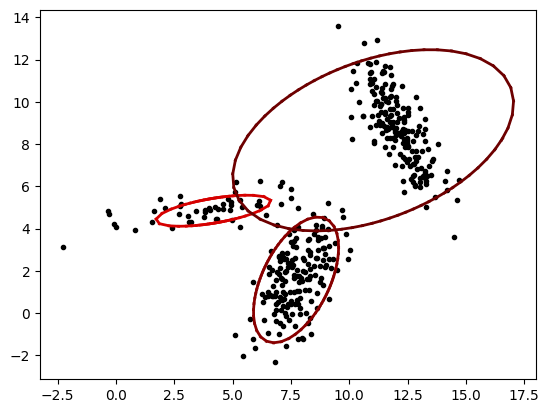

Log Likelihood After Iter 3 : -1812.987



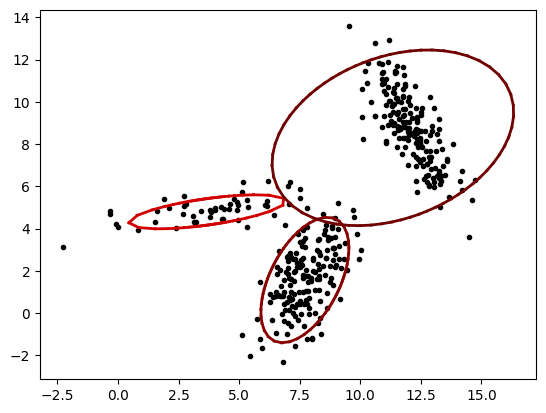

Log Likelihood After Iter 4 : -1772.028



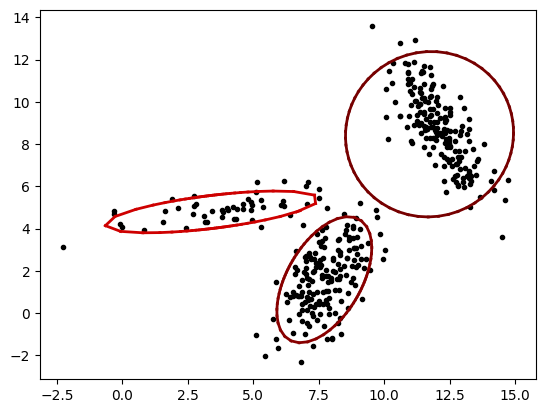

Log Likelihood After Iter 5 : -1700.688



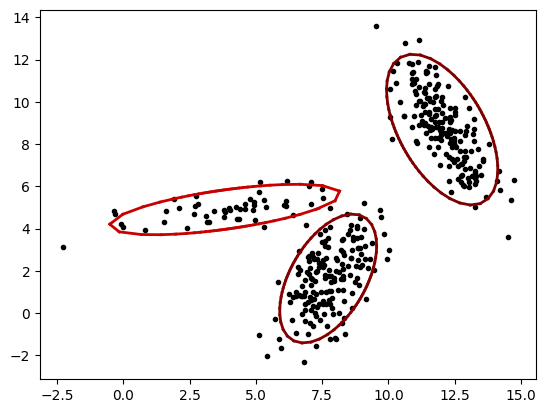

Log Likelihood After Iter 6 : -1597.847



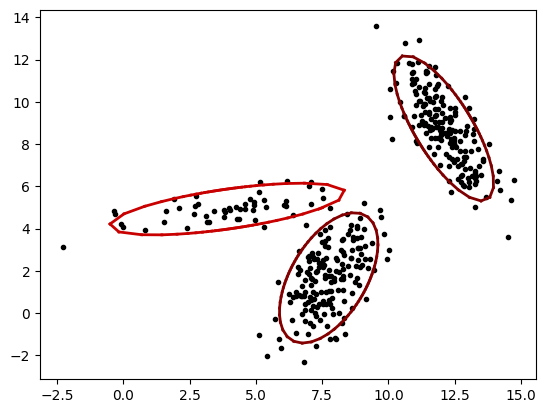

Log Likelihood After Iter 7 : -1573.702



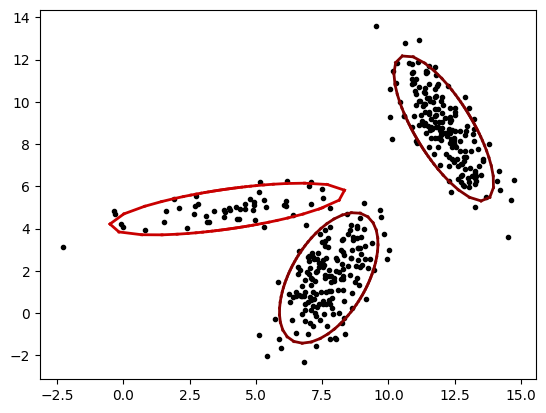

Log Likelihood After Iter 8 : -1573.701



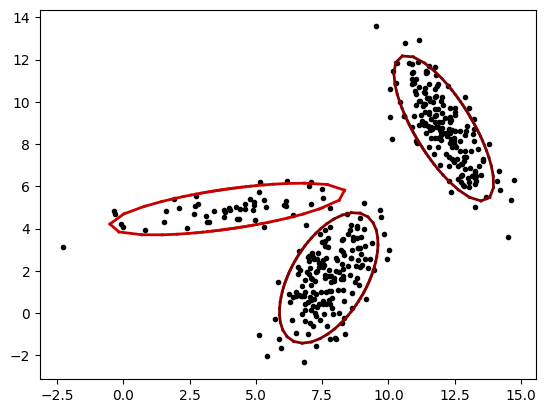

Log Likelihood After Iter 9 : -1573.701



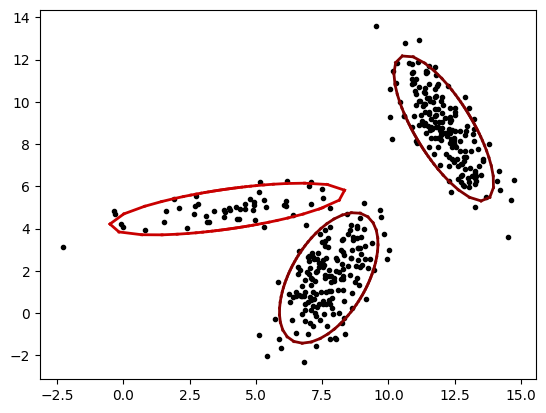

Log Likelihood After Iter 10 : -1573.701



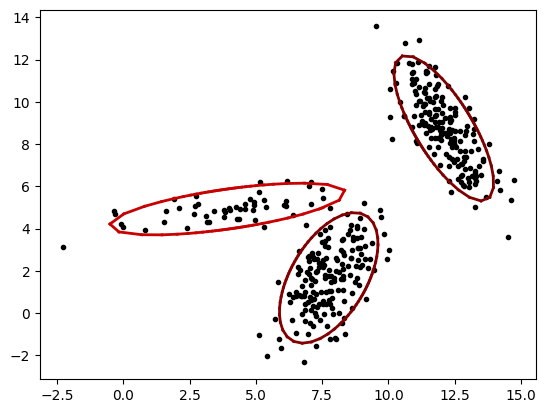

Log Likelihood After Iter 11 : -1573.701



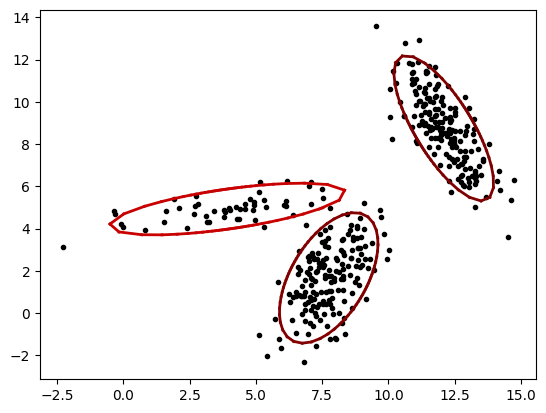

Log Likelihood After Iter 12 : -1573.701



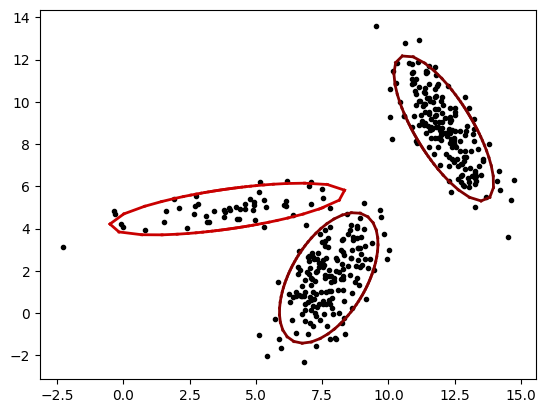

Log Likelihood After Iter 13 : -1573.701



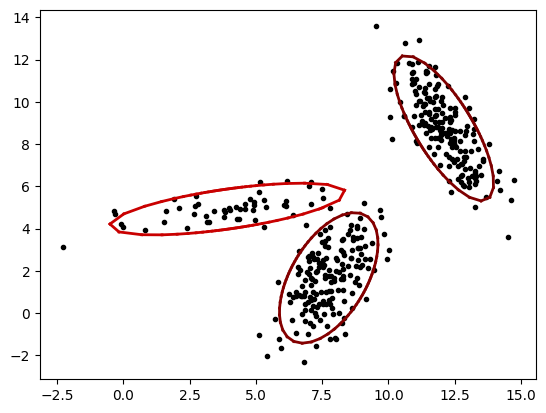

Log Likelihood After Iter 14 : -1573.701



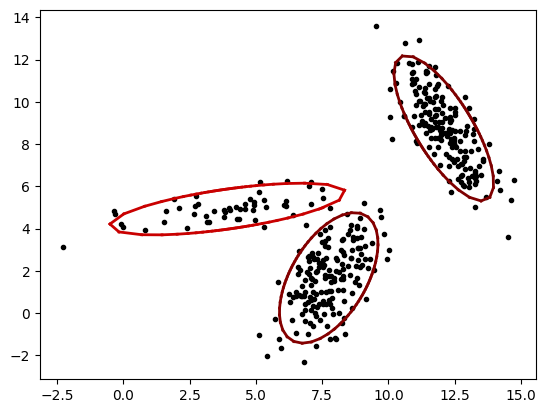

Log Likelihood After Iter 15 : -1573.701



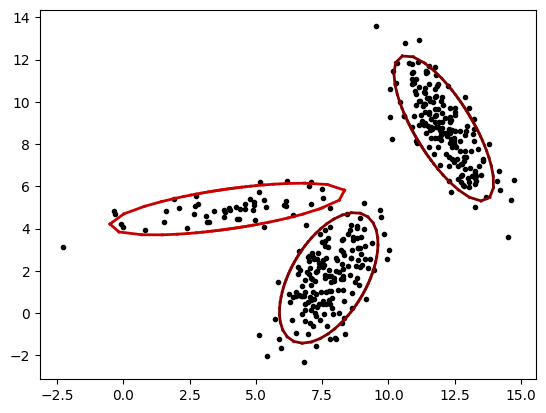

Log Likelihood After Iter 16 : -1573.701



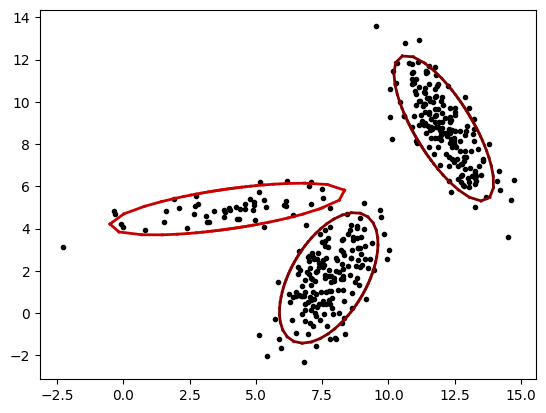

Log Likelihood After Iter 17 : -1573.701



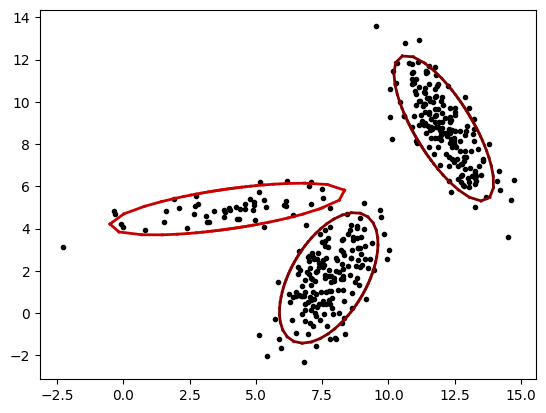

Log Likelihood After Iter 18 : -1573.701



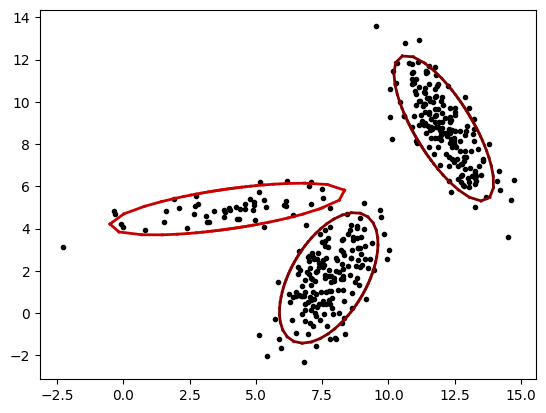

Log Likelihood After Iter 19 : -1573.701



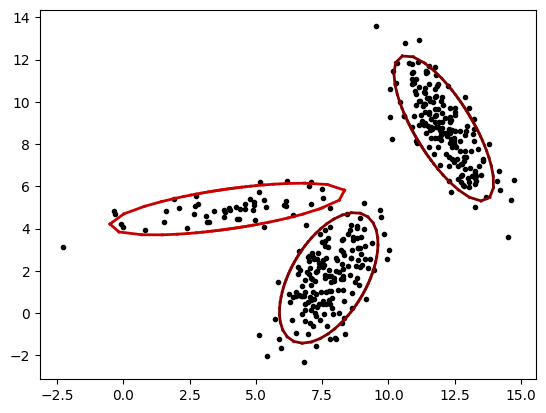

Log Likelihood After Iter 20 : -1573.701



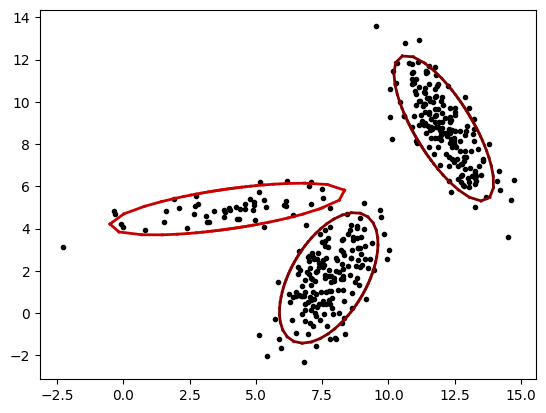

Log Likelihood After Iter 21 : -1573.701



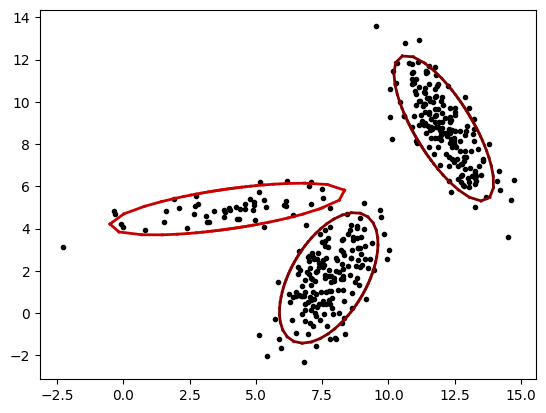

Log Likelihood After Iter 22 : -1573.701



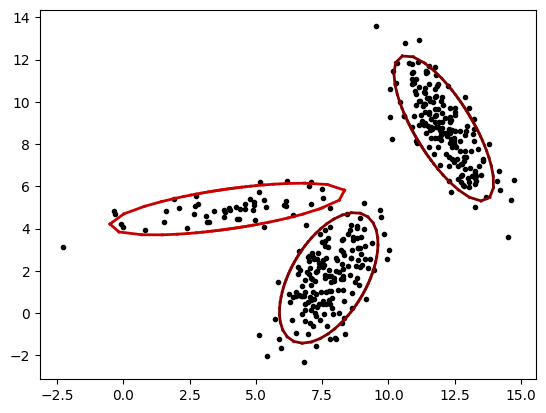

Log Likelihood After Iter 23 : -1573.701



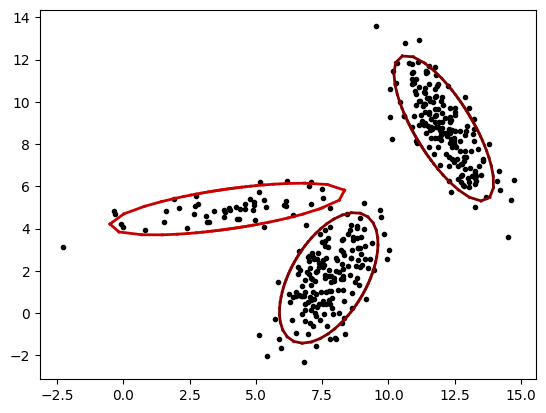

Log Likelihood After Iter 24 : -1573.701



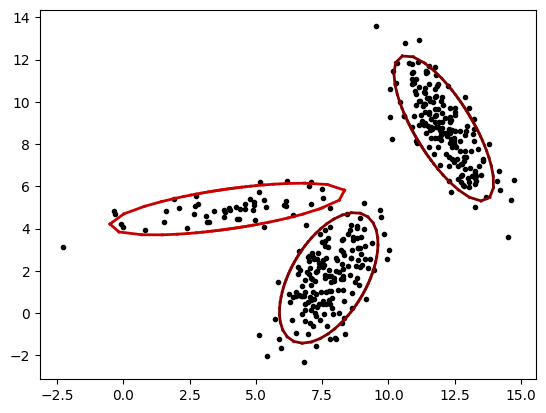

Log Likelihood After Iter 25 : -1573.701



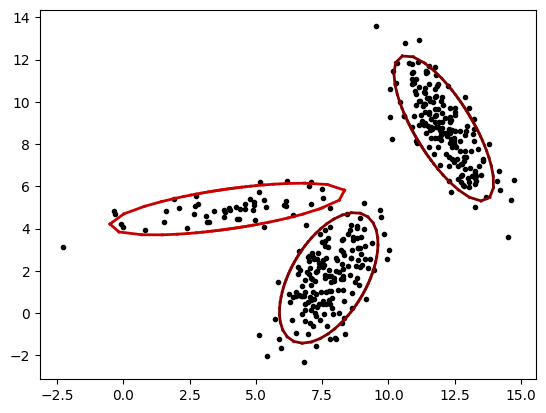

Log Likelihood After Iter 26 : -1573.701



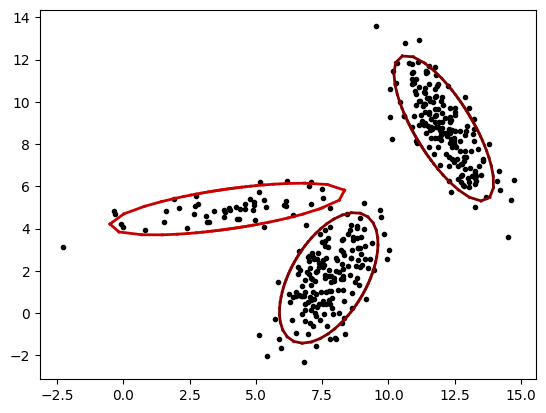

Log Likelihood After Iter 27 : -1573.701



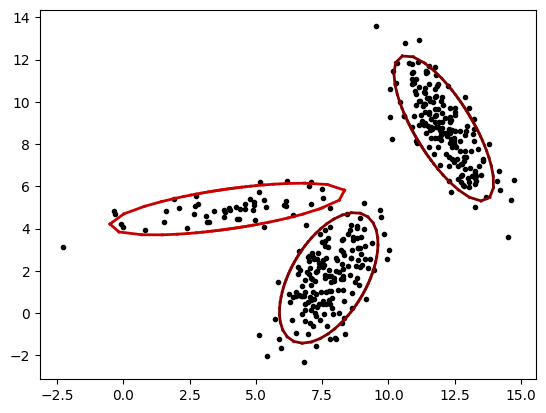

Log Likelihood After Iter 28 : -1573.701



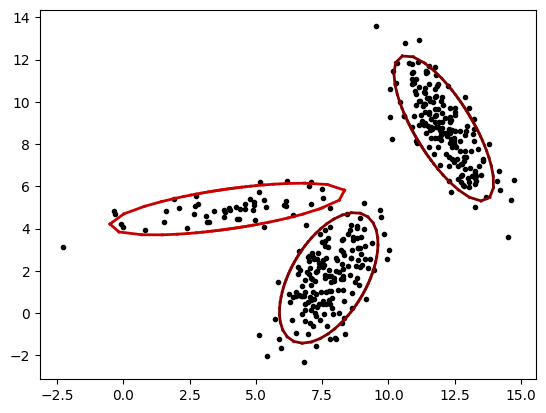

Log Likelihood After Iter 29 : -1573.701



In [56]:
#define number of components to estimate
nGaussEst = 3

#fit mixture of Gaussians (Pretend someone handed you some data. Now what?)
#TO DO fill in this routine (below)
mixGaussEst = fitMixGauss(data,nGaussEst)